# **NY Motor Vehicle Collisions Analysis** 



The following is the Exploratory Analysis of Motorvehicle Collisions in New York city. The given dataset consists details for each  vehicle involved in crash. The data file has 3.7M rows and 25 attributes. Each row represents a vehicle involved in crash.

The attributes used for the analysis

1.) Crash Date: Date on which the accident took place

2.) Vehicle Make: Name of the manufacturer who produced the vehicle

3.) Vehicle Type: Type of the vehicle


### **Data Pre-processing**

In [1]:
#Mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Reading CSV file
file_path = "/content/drive/MyDrive/NYC_Accident_Analysis_Data.csv"
nyc_accident_data_df = pd.read_csv(file_path, low_memory=False)
print(nyc_accident_data_df.shape)

(3704406, 25)


In [4]:
#Extracting data between 01-June-2018 to 31-May-2020
start_date='2018-06-01'
mid_date='2019-05-31'
end_date='2020-05-31'

nyc_accident_data_df['CRASH_DATE']=pd.to_datetime(nyc_accident_data_df['CRASH_DATE'])
extracted_two_year_df = nyc_accident_data_df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date')
print(extracted_two_year_df.shape)

(807465, 25)


In [5]:
#Storing extracted data into seperate file
extracted_two_year_df.to_csv("/content/drive/MyDrive/Extracted_Two_Year_Data.csv")

### **Cleaning Data for Analysis 1 and Analysis 2**


In [6]:
#Dropping null values from vehicle make column
extracted_two_year_df=extracted_two_year_df.dropna(subset=['VEHICLE_MAKE'])

In [7]:
#Seperating month and year from crash date
extracted_two_year_df.loc['CRASH_DATE']=pd.to_datetime(extracted_two_year_df['CRASH_DATE'])
extracted_two_year_df['YEAR'],extracted_two_year_df['MONTH']=extracted_two_year_df['CRASH_DATE'].dt.year, extracted_two_year_df['CRASH_DATE'].dt.month

In [8]:
#Cleaning vehicle make column values
#Function to clean the names
def Clean_names(vehicle_name):
#Regex to search for hyphen(-) in the name followed by any #characters repeated any number of times
    if re.search('\-.*', str(vehicle_name)):  
        #Extract the position of beginning of pattern
        pos = re.search('\-.*', str(vehicle_name)).start()  
        #Return the cleaned name
        return vehicle_name[:pos]  
    else:
        #If clean up needed return the same name
        return vehicle_name

#Remove Spaces from the Cleaned Vehicle Names       
def Remove_spaces(vehicle_name):
  return str(vehicle_name).replace(" ", "")

In [9]:
#Slicing vehicle make column values
extracted_two_year_df['VEHICLE_MAKE'] = extracted_two_year_df['VEHICLE_MAKE'].apply(Clean_names)

#Removing spaces from vehicle make column values
extracted_two_year_df['VEHICLE_MAKE'] = extracted_two_year_df['VEHICLE_MAKE'].apply(Remove_spaces)

#Changing vehicle make column values to upper case
extracted_two_year_df['VEHICLE_MAKE'] = extracted_two_year_df['VEHICLE_MAKE'].str.upper()

In [10]:
#Replacing other column values containing additional characters
kw = extracted_two_year_df.loc[extracted_two_year_df['VEHICLE_MAKE'].str.contains("kw", case=False,  na=False)]
print(kw.VEHICLE_MAKE.unique())
extracted_two_year_df=extracted_two_year_df.replace('KWH','KW')

toyt = extracted_two_year_df.loc[extracted_two_year_df['VEHICLE_MAKE'].str.contains("toyt", case=False,  na=False)]
print(toyt.VEHICLE_MAKE.unique())
extracted_two_year_df=extracted_two_year_df.replace('TOYTA','TOYT')

volv = extracted_two_year_df.loc[extracted_two_year_df['VEHICLE_MAKE'].str.contains("volv", case=False,  na=False)]
print(volv.VEHICLE_MAKE.unique())
extracted_two_year_df=extracted_two_year_df.replace(['VOLVO','VOLVO999GOLDBROWN'],'VOLV')

suba = extracted_two_year_df.loc[extracted_two_year_df['VEHICLE_MAKE'].str.contains("suba", case=False,  na=False)]
print(suba.VEHICLE_MAKE.unique())
extracted_two_year_df=extracted_two_year_df.replace(['SUBAR', 'SUBARU'],'SUBA')

['KW' 'TANKWH' 'KWH' 'STAKWH' 'VANTKWH' 'MACKWHITETRACTOR'
 'FRH2019TRKWTM21']
['TOYT' 'TOYTA']
['VOLV' 'VOLVO' 'VOLVO999GOLDBROWN' 'CITYINVOLVEDSANITATIONTRUCK']
['SUBA' 'JIANGSUBAODIAO' 'SUBAR' 'SUBARU'
 'JIANGSUBAODIAOLOCOMOTIVECO.,LTD']


In [11]:
#Extracting June 2018 to May 2019 data for vehicle make 'KW'
kw_year_one=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('KW'))  & ('2018-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2019-05-31')])
print(kw_year_one)
#Extracting June 2019 to May 2020 data for vehicle make 'KW'
kw_year_two=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('KW'))  & ('2019-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2020-05-31')])
print(kw_year_two)

#Extracting June 2018 to May 2019 data for vehicle make 'TOYT'
toyt_year_one=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('TOYT'))  & ('2018-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2019-05-31')])
print(toyt_year_one)
#Extracting June 2019 to May 2020 data for vehicle make 'TOYT'
toyt_year_two=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('TOYT'))  & ('2019-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2020-05-31')])
print(toyt_year_two)

#Extracting June 2018 to May 2019 data for vehicle make 'VOLV'
volv_year_one=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('VOLV'))  & ('2018-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2019-05-31')])
print(volv_year_one)
#Extracting June 2019 to May 2020 data for vehicle make 'VOLV'
volv_year_two=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('VOLV'))  & ('2019-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2020-05-31')])
print(volv_year_two)

#Extracting June 2018 to May 2019 data for vehicle make 'SUBA'
suba_year_one=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('SUBA'))  & ('2018-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2019-05-31')])
print(suba_year_one)
#Extracting June 2019 to May 2020 data for vehicle make 'SUBA'
suba_year_two=len(extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE'].str.contains('SUBA'))  & ('2019-06-01' <= extracted_two_year_df['CRASH_DATE']) & (extracted_two_year_df['CRASH_DATE'] <= '2020-05-31')])
print(suba_year_two)

1466
1142
75124
54530
2422
1922
5729
4612


### **Analysis 1 : Plot Bar Graph of Number of Accidents by each Vehicle Make in each Year**

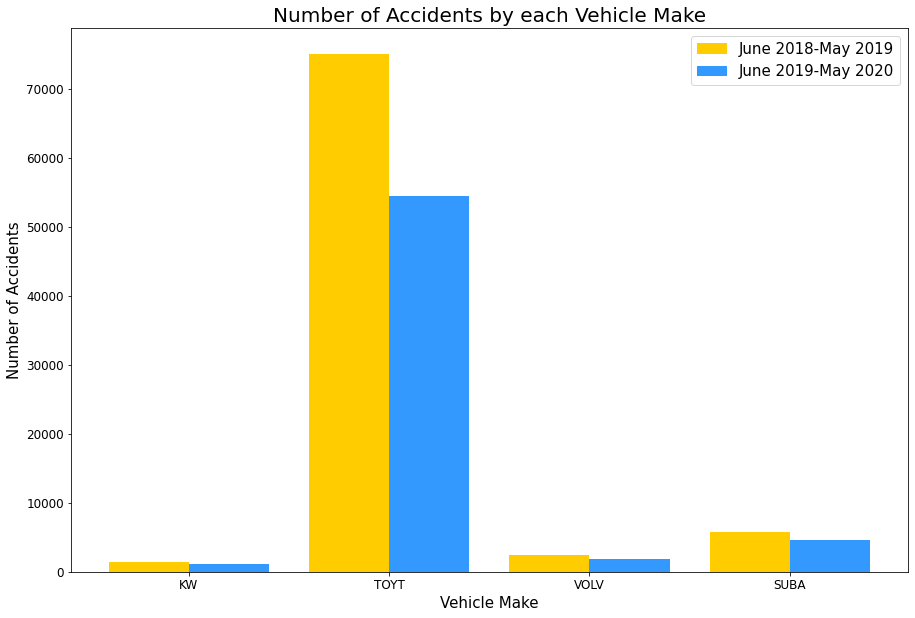

In [12]:
#Bar Graph of number of accidents by each vehicle make in each year
X=['KW','TOYT','VOLV','SUBA']
year_one=[kw_year_one, toyt_year_one, volv_year_one, suba_year_one]
year_two=[kw_year_two, toyt_year_two, volv_year_two, suba_year_two]

X_axis= np.arange(len(X))
plt.figure(figsize=[15,10])
plt.bar(X_axis - 0.2,  year_one, 0.4, label = 'June 2018-May 2019', color='#ffcc00')
plt.bar(X_axis + 0.2,  year_two, 0.4, label = 'June 2019-May 2020', color='#3399ff')
plt.xticks(X_axis, X, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Vehicle Make", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=15)
plt.title("Number of Accidents by each Vehicle Make", fontsize=20)
plt.legend(fontsize=15)

plt.show()

### **Analysis 2 : Plot Line Chart of Number of Accidents by each Vehicle Make in each Month**

Text(0.5, 1.0, 'Number of Accidents per Month from June 2019 to May 2020')

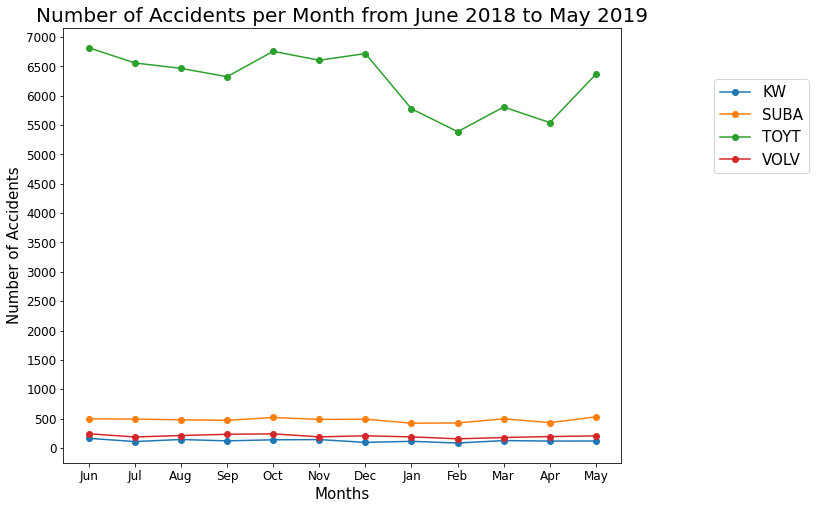

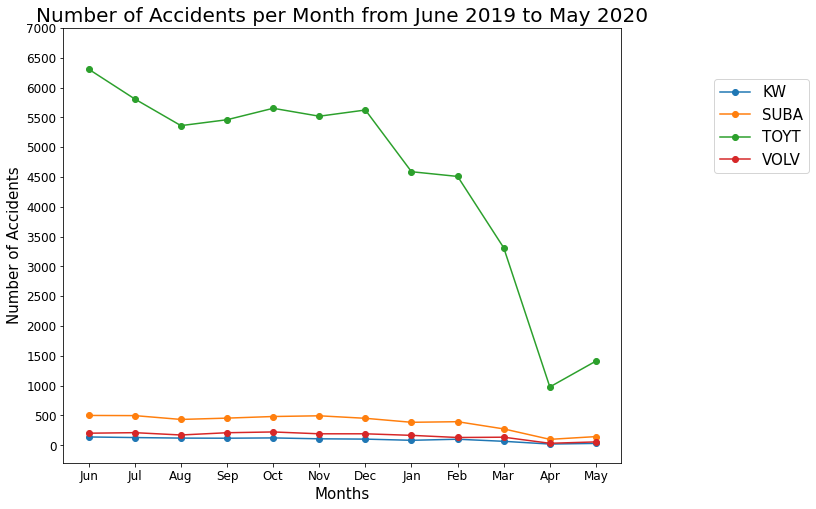

In [13]:
#Line Graph of number of accidents by each vehicle make in each month
#Extracting data for 4 vehicle make
extracted_monthly_df= extracted_two_year_df[(extracted_two_year_df['VEHICLE_MAKE']=='KW')  | (extracted_two_year_df['VEHICLE_MAKE']=='TOYT') | (extracted_two_year_df['VEHICLE_MAKE']=='VOLV') | (extracted_two_year_df['VEHICLE_MAKE']=='SUBA')]

#Extracting data from June 2018- May 2019
extracted_monthly_year_one=extracted_monthly_df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @mid_date')
#Extracting data for June 2019- May 2020
extracted_monthly_year_two=extracted_monthly_df.query('CRASH_DATE > @mid_date and CRASH_DATE <= @end_date')

#Line Chart for 2018-2019
extracted_monthly_year_one.groupby(['YEAR','MONTH','VEHICLE_MAKE']).size().unstack('VEHICLE_MAKE').plot(figsize=[10,8], marker='o')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'],fontsize=12)
plt.yticks(np.arange(0, 7500, 500), fontsize=12)
plt.legend(bbox_to_anchor=(1.35, .9), fontsize=15)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=15)
plt.title("Number of Accidents per Month from June 2018 to May 2019", fontsize=20)

#Line Chart for 2019-2020
extracted_monthly_year_two.groupby(['YEAR','MONTH','VEHICLE_MAKE']).size().unstack('VEHICLE_MAKE').plot(figsize=[10,8], marker='o')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'], fontsize=12)
plt.yticks(np.arange(0, 7500, 500), fontsize=12)
plt.legend(bbox_to_anchor=(1.35, .9), fontsize=15)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=15)
plt.title("Number of Accidents per Month from June 2019 to May 2020", fontsize=20)

### **Cleaning Data for Analysis 3**

In [14]:
#Extracting two year data again for Analysis 3
extracted_analysis_three = nyc_accident_data_df.query('CRASH_DATE >= @start_date and CRASH_DATE <= @end_date')


In [15]:
#Replacing irrelevant values with NaN
extracted_analysis_three=extracted_analysis_three.replace(['UNK', 'Unk', 'unkow', 'Unkno', 'unkno', 'UNKNO', 'none', 'Unknown', 'UNKNOWN', 'other', 'Other', ' ','0'],np.NaN)

In [16]:
#Dropping null values from vehicle type column
extracted_analysis_three = extracted_analysis_three.dropna(subset=['VEHICLE_TYPE'])

In [17]:
#Counting unique values for each vehicle type
sedans = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("sedan", case=False,  na=False)]
print(sedans.VEHICLE_TYPE.unique())

passenger_vehicles = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("passenger", case=False,  na=False)]
print(passenger_vehicles.VEHICLE_TYPE.unique())

sport_utility_vehicles = extracted_analysis_three.loc[(extracted_analysis_three['VEHICLE_TYPE'].str.contains("wagon", case=False,  na=False))|(extracted_analysis_three['VEHICLE_TYPE'].str.contains("utili", case=False,  na=False))]
print(sport_utility_vehicles.VEHICLE_TYPE.unique())

taxis = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("taxi", case=False,  na=False)]
print(taxis.VEHICLE_TYPE.unique())

vans = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("van", case=False,  na=False)]
print(vans.VEHICLE_TYPE.unique())

bikes = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("bik", case=False,  na=False)]
print(bikes.VEHICLE_TYPE.unique())

bus = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("bus", case=False,  na=False)]
print(bus.VEHICLE_TYPE.unique())

trucks = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("truck", case=False,  na=False)]
print(trucks.VEHICLE_TYPE.unique())

motorcycle = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("motor", case=False,  na=False)]
print(motorcycle.VEHICLE_TYPE.unique())

bicycle = extracted_analysis_three.loc[extracted_analysis_three['VEHICLE_TYPE'].str.contains("bicyc", case=False,  na=False)]
print(bicycle.VEHICLE_TYPE.unique())

['Sedan' '4 dr sedan' '2 dr sedan' 'sedan']
['passenger']
['Station Wagon/Sport Utility Vehicle' 'UTILI' 'Wagon' 'utili'
 'Lunch Wagon' 'Utili' 'WAGON' 'wagon' 'UTILITY TR' 'Utility' 'UTILITY'
 'Utility.' 'UTILITY VA' 'utility']
['Taxi']
['Refrigerated Van' 'Van' 'CARGO VAN' 'van' 'van t' 'VAN T' 'Vanette'
 'Van Camper' 'VAN A' 'Van T' 'Van (' 'VAN/T' 'van c' 'VAN C' 'van a'
 'DEPT VAN #' 'RV/VAN' 'Work van' 'Ford Van']
['Bike' 'Motorbike' 'E-Bik' 'E-BIK' 'Minibike' 'E BIK' 'E Bik' 'e-bik'
 'e-BIK' 'EBIKE' 'E/BIK' 'e BIK' 'E-bik' 'e bik' 'E bik' 'E-Bike' 'E-BIKE'
 'DIRT BIKE' 'E bike' 'Dirt bike' 'E-bike']
['Bus' 'School Bus' 'bus' 'school bus' 'SCHOOL BUS' 'MTA BUS' 'BLU BUS'
 'SCHOOLBUS' 'omnibus' 'BUs' 'School bus' 'mta bus' 'TOUR BUS' 'MTA Bus'
 'Short Bus']
['Box Truck' 'Pick-up Truck' 'Tractor Truck Diesel' 'Tow Truck / Wrecker'
 'Armored Truck' 'Tractor Truck Gasoline' 'Beverage Truck' 'TRUCK'
 'Tow Truck' 'FIRE TRUCK' 'Truck' 'truck' 'box truck' 'FDNY TRUCK'
 'Firetruck' 'BOX T

In [18]:
#Grouping similar vehicles in specific categories
extracted_analysis_three=extracted_analysis_three.replace(['Sedan', '4 dr sedan', '2 dr sedan', 'sedan'],'Sedans')
extracted_analysis_three=extracted_analysis_three.replace('passenger','Passenger Vehicle')
extracted_analysis_three=extracted_analysis_three.replace(['Station Wagon/Sport Utility Vehicle', 'Wagon', 'Lunch Wagon', 'WAGON', 'wagon', 'UTILITY TR', 'Utility', 'UTILITY', 'Utility.', 'UTILITY VA', 'utility'],'Sports Utility Vehicle')
extracted_analysis_three=extracted_analysis_three.replace(['Refrigerated Van', 'CARGO VAN', 'van', 'van t', 'VAN T', 'Van Camper', 'VAN A', 'Van T', 'Van (', 'VAN/T', 'van c', 'VAN C', 'van a', 'DEPT VAN #', 'RV/VAN', 'Work van', 'Ford Van'],'Van')
extracted_analysis_three=extracted_analysis_three.replace(['Motorbike', 'E-Bik', 'E-BIK', 'Minibike', 'E BIK', 'E Bik', 'e-bik', 'e-BIK', 'EBIKE', 'E/BIK', 'e BIK', 'E-bik', 'e bik', 'E bik', 'E-Bike', 'E-BIKE', 'DIRT BIKE', 'E bike', 'Dirt bike', 'E-bike'],'Bike')
extracted_analysis_three=extracted_analysis_three.replace(['School Bus', 'bus', 'school bus', 'SCHOOL BUS', 'MTA BUS', 'BLU BUS', 'SCHOOLBUS', 'omnibus', 'BUs', 'School bus', 'mta bus', 'TOUR BUS', 'MTA Bus', 'Short Bus'],'Bus')
extracted_analysis_three=extracted_analysis_three.replace(['Box Truck', 'Pick-up Truck', 'Tractor Truck Diesel', 'Tow Truck / Wrecker', 'Armored Truck', 'Tractor Truck Gasoline', 'Beverage Truck', 'TRUCK', 'Tow Truck', 'FIRE TRUCK', 'Truck', 'truck', 'box truck', 'FDNY TRUCK', 'Firetruck', 'BOX TRUCK', 'Tow truck', 'TOW TRUCK', 'USPS TRUCK', 'food truck', 'Fire truck', 'fire truck', 'FIRETRUCK', 'MAIL TRUCK', 'Dump truck', 'dump truck', 'FD TRUCK', 'DUMP TRUCK', 'Fire Truck', 'firetruck', 'FOOD TRUCK', 'mail truck', 'towe truck', 'fdny truck', 'DOT TRUCK', 'tow truck', 'mailtruck', 'BOX Truck', 'Box truck'],'Trucks')
extracted_analysis_three=extracted_analysis_three.replace(['BICYC', 'Bicyc'],'Bicycle')

In [19]:
#Number of accidents by each vehicle type from June 2018 to May 2020
Sedans=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Sedans'))])
print(Sedans)
PassengerVehicle=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Passenger Vehicle'))])
print(PassengerVehicle)
SportsUtilityVehicle=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Sports Utility Vehicle'))])
print(SportsUtilityVehicle)
Taxi=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Taxi'))])
print(Taxi)
Van=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Van'))])
print(Van)
Bike=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Bike'))])
print(Bike)
Bus=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Bus'))])
print(Bus)
Trucks=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Trucks'))])
print(Trucks)
Motorcycle=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Motorcycle'))])
print(Motorcycle)
Bicycle=len(extracted_analysis_three[(extracted_analysis_three['VEHICLE_TYPE'].str.contains('Bicycle'))])
print(Bicycle)

332444
1
276449
33846
5495
12537
12337
50458
3908
2


### **Analysis 3 : Plot Pie Chart of Number of Accidents by each Vehicle Type from June 2018 to May 2020**

(-1.1250760970975804, 1.1104297526879268, -1.12807402272315, 1.310860667740776)

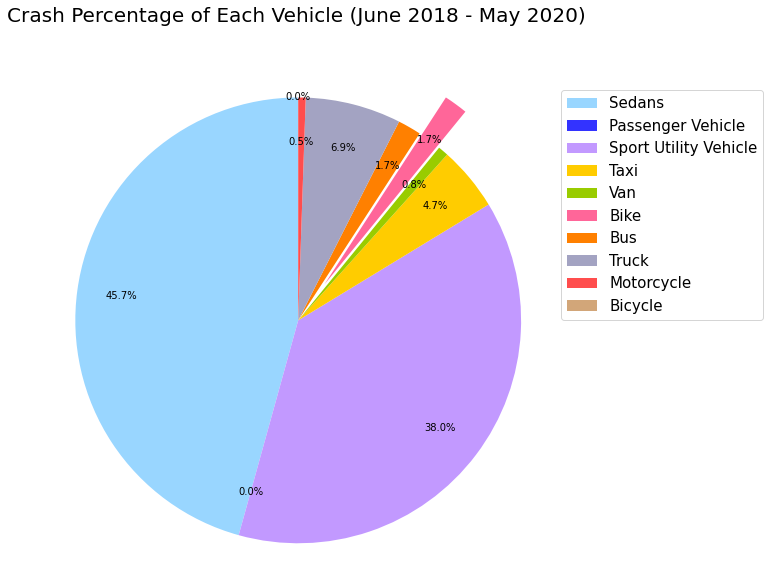

In [20]:
#Pie Chart of crash percentages for each vehicle type from June 2018 to May 2020

VehicleTypeData = [Sedans,PassengerVehicle, SportsUtilityVehicle, Taxi, Van, Bike, Bus, Trucks, Motorcycle, Bicycle]
labels = ['Sedans','Passenger Vehicle', 'Sport Utility Vehicle', 'Taxi', 'Van', 'Bike', 'Bus', 'Truck', 'Motorcycle', 'Bicycle']
colors=['#99d6ff','#3333ff','#c299ff','#ffcc00','#99cc00','#ff6699','#ff8000','#a3a3c2','#ff4d4d','#d2a679']
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(VehicleTypeData, autopct='%1.1f%%', explode=[0,0,0,0,0,0.2,0,0,0,0.2], shadow=False, startangle=90, pctdistance=0.8, colors=colors)
plt.title('Crash Percentage of Each Vehicle (June 2018 - May 2020)', fontsize=20)
plt.legend(labels=labels, bbox_to_anchor=(1.35, .9), fontsize=15)
plt.axis('equal')